<a href="https://colab.research.google.com/github/DeepthiManthapuram/MachineLearning-Algorithms/blob/main/RandamForest_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Social_Network_Ads.csv")

In [7]:
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [8]:
df.isna().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
x = df.iloc[:, 2:4].values   # all rows, columns 2 to 3
y = df.iloc[:, -1].values   # all rows, last column


In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)


In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [15]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(
    n_estimators=10,
    criterion = "entropy"
)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [16]:
y_pred = classifier.predict(x_test)

In [17]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8875


In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
print(cm)


[[47  5]
 [ 4 24]]


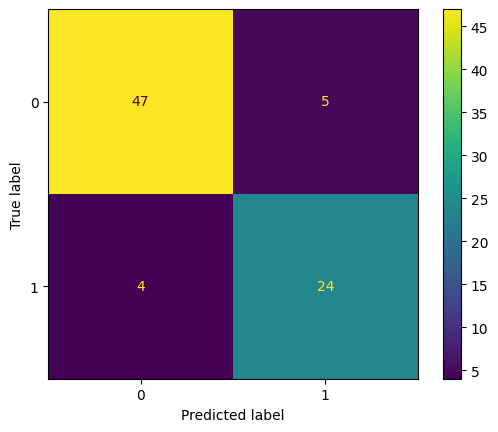

In [19]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


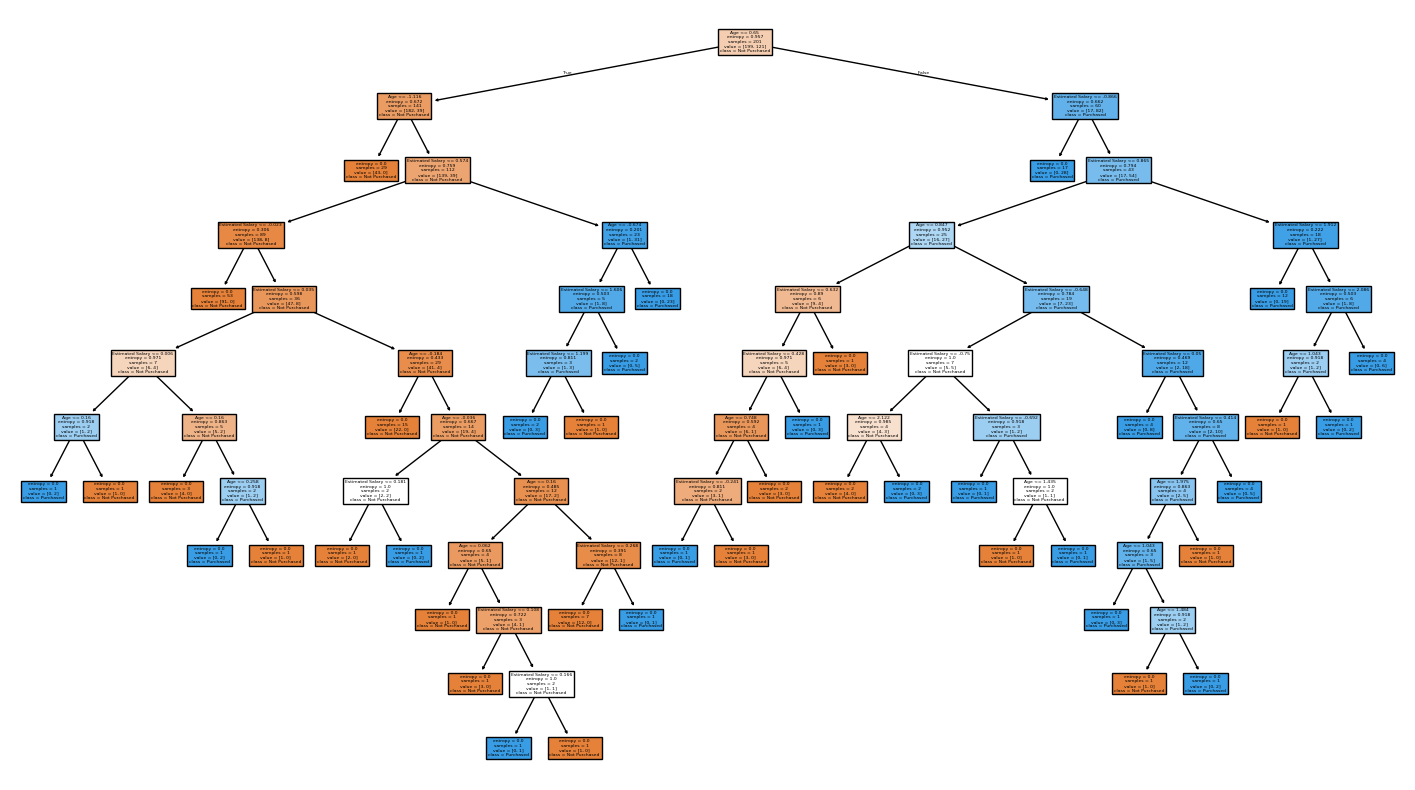

In [23]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

single_tree = classifier.estimators_[1] # sixth tree
plt.figure(figsize=(18,10))
plot_tree(
    single_tree,
    feature_names = ["Age","Estimated Salary"],
    class_names = ["Not Purchased","Purchased"],
    filled = True,
    rounded = False
)
plt.show()